In [1]:
import cv2
import os
import pandas as pd
import numpy as np

In [2]:
path = "Images/traffic_Data/DATA"

In [3]:
labelFile = 'Images/labels.csv'

In [4]:
print(labelFile)

Images/labels.csv


In [5]:
cwd = os.getcwd()
files = os.listdir(cwd)
print("Files in %r: %s" % (cwd, files))

Files in '/home/sweekar/PycharmProjects/TrafficSignDetection': ['.ipynb_checkpoints', 'Images', 'TrafficSign.ipynb']


In [6]:
file = pd.read_csv(labelFile)

In [7]:
file.head()

,ClassId,Name
0,0,Speed limit (5km/h)
1,1,Speed limit (15km/h)
2,2,Speed limit (30km/h)
3,3,Speed limit (40km/h)
4,4,Speed limit (50km/h)


In [8]:
batch_size_val = 50
epochs_val =10
imageDimensions=(32,32,3)
testRatio = 0.2
validationRatio = 0.2

In [9]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses = len(myList)

Total Classes Detected: 58


In [10]:
print("Importing Classes...")
for x in range(0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        curImg = cv2.resize(curImg,(32,32))
        images.append(curImg)
        classNo.append(count)
    print(count,end=" ")
    count+=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Importing Classes...
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57  


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(images,classNo,test_size=testRatio)

In [13]:
X_train,X_validation,Y_train,Y_validation = train_test_split(X_train,Y_train,test_size=validationRatio)

In [14]:
print(f'Rows of training sets: {len(X_train)}\nNumber of Labels for train sets: {len(Y_train)}\nRows of testing sets: {len(X_test)}')

Rows of training sets: 2668
Number of Labels for train sets: 2668
Rows of testing sets: 834


In [15]:
print("Data Shapes")
print("Train", end="");print(X_train.shape,Y_train.shape)
print("Test", end="");print(X_test.shape,Y_test.shape)
print("Validation", end="");print(X_validation.shape,Y_validation.shape)

Data Shapes
Train(2668, 32, 32, 3) (2668,)
Test(834, 32, 32, 3) (834,)
Validation(668, 32, 32, 3) (668,)


In [16]:
import matplotlib.pyplot as plt

In [17]:
import random

[70, 20, 54, 164, 53, 134, 48, 96, 4, 2, 53, 87, 55, 24, 85, 13, 92, 85, 5, 3, 13, 7, 7, 9, 60, 2, 83, 16, 297, 30, 86, 23, 8, 4, 17, 100, 25, 34, 19, 19, 25, 14, 23, 53, 22, 16, 10, 8, 7, 29, 38, 8, 20, 1, 221, 93, 71, 3]


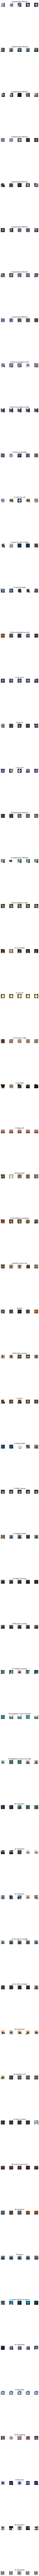

In [18]:
num_of_samples= []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,300))
fig.tight_layout()
for i in range(cols):
    for j,row in file.iterrows(): 
        x_selected = X_train[Y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i ==2:
            axs[j][i].set_title(str(j)+"-"+row["Name"])
            num_of_samples.append(len(x_selected))
    
print(num_of_samples)

58


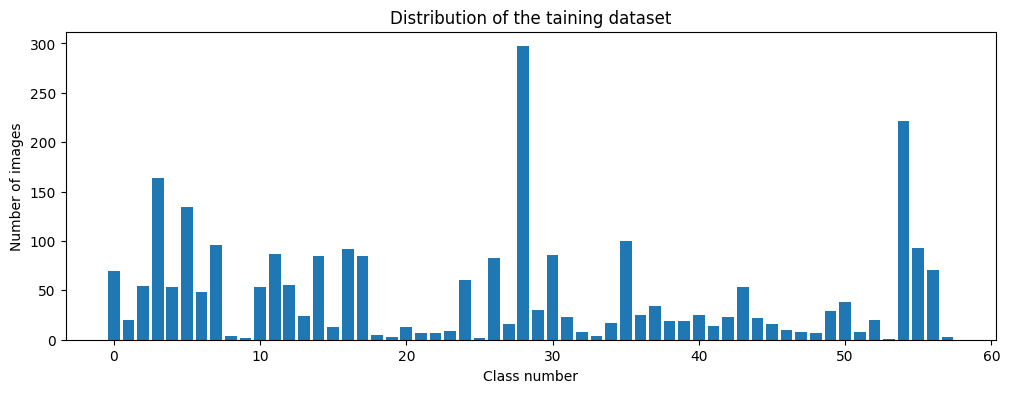

In [19]:
print(len(num_of_samples))
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes), num_of_samples)
plt.title("Distribution of the taining dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [20]:
def grayScale(img):
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img

In [21]:
def equalize(img):
    img=cv2.equalizeHist(img)
    return img

In [22]:
def preprocessing(img):
    img=grayScale(img)
    img=equalize(img)
    img=img/255
    return img

In [23]:
import numpy as np

In [24]:
X_train=np.array(list(map(preprocessing,X_train)))
print(X_train)

[[[0.66666667 0.73333333 0.73333333 ... 0.73333333 0.54117647 0.5254902 ]
  [0.73333333 0.66666667 0.73333333 ... 0.94901961 0.         0.01960784]
  [0.74509804 0.66666667 0.66666667 ... 0.94509804 0.00784314 0.07058824]
  ...
  [0.87843137 0.87843137 0.91372549 ... 0.03137255 0.14117647 0.34901961]
  [0.91372549 0.91372549 0.91372549 ... 0.00784314 0.01176471 0.03137255]
  [0.91372549 0.84705882 0.81176471 ... 0.92156863 0.9372549  0.9372549 ]]

 [[0.23137255 0.1254902  0.22352941 ... 0.61176471 0.61176471 0.69411765]
  [0.21176471 0.14509804 0.19607843 ... 0.35294118 0.32941176 0.32941176]
  [0.16470588 0.14509804 0.17254902 ... 0.16470588 0.1254902  0.1372549 ]
  ...
  [0.95686275 0.27843137 0.30196078 ... 0.09803922 0.65882353 0.57647059]
  [0.90588235 0.35294118 0.4        ... 0.61176471 0.22352941 0.65882353]
  [0.8627451  0.23137255 0.24313725 ... 0.65882353 0.65882353 0.30196078]]

 [[0.41176471 0.14117647 0.19215686 ... 0.39215686 0.69411765 0.66666667]
  [0.43529412 0.031372

In [25]:
X_validation=np.array(list(map(preprocessing,X_validation)))
print(X_validation)

[[[0.85098039 0.98823529 0.98823529 ... 0.85098039 0.85098039 0.85098039]
  [0.98823529 0.98823529 0.98823529 ... 0.85098039 0.85098039 0.74901961]
  [0.85098039 0.98823529 0.98823529 ... 0.85098039 0.85098039 0.70980392]
  ...
  [0.61568627 0.64313725 0.64313725 ... 0.03921569 0.01176471 0.02745098]
  [0.61568627 0.61568627 0.61568627 ... 0.01176471 0.00392157 0.04705882]
  [0.60784314 0.61568627 0.60784314 ... 0.         0.00784314 0.01176471]]

 [[0.81176471 0.78431373 0.6        ... 0.00392157 0.01176471 0.10980392]
  [0.12941176 0.29019608 0.78823529 ... 0.07058824 0.17254902 0.2745098 ]
  [0.09019608 0.36862745 0.90588235 ... 0.1372549  0.17254902 0.10980392]
  ...
  [0.3372549  0.2745098  0.58823529 ... 0.72941176 0.67058824 0.20392157]
  [0.14117647 0.62352941 0.2745098  ... 0.72156863 0.72156863 0.70980392]
  [0.23137255 0.28235294 0.2745098  ... 0.70588235 0.70196078 0.54117647]]

 [[0.65098039 0.65098039 0.61568627 ... 0.94901961 0.94901961 0.94901961]
  [0.65098039 0.650980

In [26]:
X_test=np.array(list(map(preprocessing,X_test)))

In [27]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

2022-10-27 15:02:04.554945: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-27 15:02:04.699492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sweekar/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-27 15:02:04.699508: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-27 15:02:04.752192: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already

In [29]:
dataGen = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [30]:
dataGen.fit(X_train)
batches=dataGen.flow(X_train,Y_train,batch_size=20)
X_batch,Y_batch = next(batches)

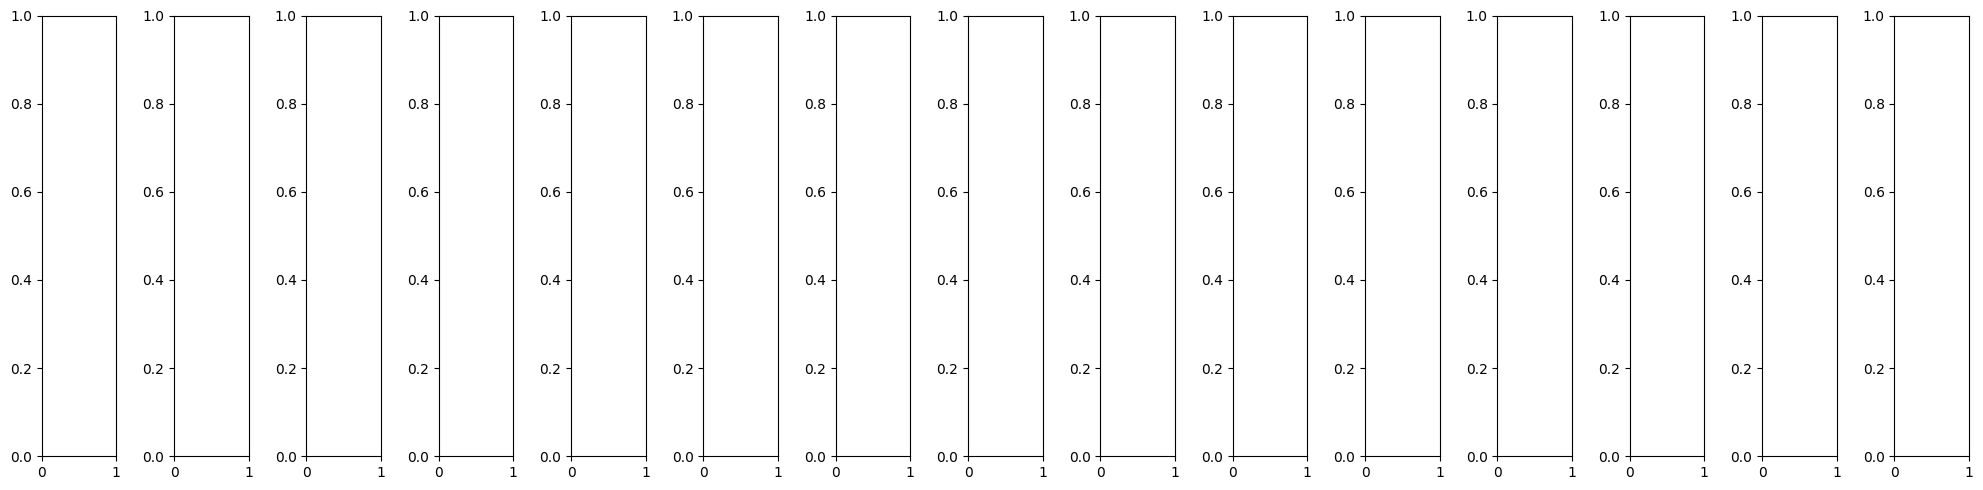

In [31]:
fig,axs=plt.subplots(1,15,figsize=(20,5))
fig.tight_layout()

In [32]:
Y_train = to_categorical(Y_train,noOfClasses)
Y_validation= to_categorical(Y_validation,noOfClasses)
Y_test = to_categorical(Y_test,noOfClasses)

In [33]:
def Model():
    no_of_filters = 60
    size_of_filter=(5,5)
    size_of_filter2=(3,3)
    size_of_pool=(2,2)
    no_of_nodes= 500
    
    model = Sequential()
    
    model.add((Conv2D(no_of_filters,size_of_filter,input_shape=(imageDimensions[0],imageDimensions[1],1),activation='relu')))
    model.add((Conv2D(no_of_filters,size_of_filter,activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    
    model.add((Conv2D(no_of_filters//2,size_of_filter2,activation='relu')))
    model.add((Conv2D(no_of_filters//2,size_of_filter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=size_of_pool))
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    model.add(Dense(no_of_nodes,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(noOfClasses,activation='softmax'))
    
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [34]:
print("X_train",X_train)
print("Y_train",Y_train)
print("X_validation",X_validation)
print("Y_validation",Y_validation)

X_train [[[[0.66666667]
   [0.73333333]
   [0.73333333]
   ...
   [0.73333333]
   [0.54117647]
   [0.5254902 ]]

  [[0.73333333]
   [0.66666667]
   [0.73333333]
   ...
   [0.94901961]
   [0.        ]
   [0.01960784]]

  [[0.74509804]
   [0.66666667]
   [0.66666667]
   ...
   [0.94509804]
   [0.00784314]
   [0.07058824]]

  ...

  [[0.87843137]
   [0.87843137]
   [0.91372549]
   ...
   [0.03137255]
   [0.14117647]
   [0.34901961]]

  [[0.91372549]
   [0.91372549]
   [0.91372549]
   ...
   [0.00784314]
   [0.01176471]
   [0.03137255]]

  [[0.91372549]
   [0.84705882]
   [0.81176471]
   ...
   [0.92156863]
   [0.9372549 ]
   [0.9372549 ]]]


 [[[0.23137255]
   [0.1254902 ]
   [0.22352941]
   ...
   [0.61176471]
   [0.61176471]
   [0.69411765]]

  [[0.21176471]
   [0.14509804]
   [0.19607843]
   ...
   [0.35294118]
   [0.32941176]
   [0.32941176]]

  [[0.16470588]
   [0.14509804]
   [0.17254902]
   ...
   [0.16470588]
   [0.1254902 ]
   [0.1372549 ]]

  ...

  [[0.95686275]
   [0.27843137]

In [35]:
steps_per_epoch_val = len(X_train)//batch_size_val
model = Model()
print(model.summary())
history=model.fit_generator(dataGen.flow(X_train,Y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,Y_validation))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 60)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 30)         0         
 2D)                                                    

2022-10-27 15:02:08.328045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sweekar/.local/lib/python3.10/site-packages/cv2/../../lib64:
2022-10-27 15:02:08.328078: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-27 15:02:08.328104: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sweekar-Aspire-A514-51): /proc/driver/nvidia/version does not exist
2022-10-27 15:02:08.328403: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/sweekar/.

                                                                 
Total params: 385,538
Trainable params: 385,538
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10


/tmp/ipykernel_42282/802857193.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(dataGen.flow(X_train,Y_train,batch_size=batch_size_val),steps_per_epoch=steps_per_epoch_val,epochs=epochs_val,validation_data=(X_validation,Y_validation))


53/53 [==============================] - 17s 310ms/step - loss: 3.7013 - accuracy: 0.0909 - val_loss: 3.4935 - val_accuracy: 0.1108
Epoch 2/10
53/53 [==============================] - 16s 300ms/step - loss: 3.5221 - accuracy: 0.1165 - val_loss: 3.2595 - val_accuracy: 0.1452
Epoch 3/10
53/53 [==============================] - 15s 289ms/step - loss: 3.2049 - accuracy: 0.2051 - val_loss: 2.5637 - val_accuracy: 0.3892
Epoch 4/10
53/53 [==============================] - 15s 288ms/step - loss: 2.6846 - accuracy: 0.3216 - val_loss: 1.8721 - val_accuracy: 0.5105
Epoch 5/10
53/53 [==============================] - 15s 285ms/step - loss: 2.2613 - accuracy: 0.4011 - val_loss: 1.4051 - val_accuracy: 0.5913
Epoch 6/10
53/53 [==============================] - 15s 287ms/step - loss: 1.9587 - accuracy: 0.4683 - val_loss: 1.1755 - val_accuracy: 0.6617
Epoch 7/10
53/53 [==============================] - 15s 290ms/step - loss: 1.7584 - accuracy: 0.5088 - val_loss: 0.9633 - val_accuracy: 0.7350
Epoch 8/10

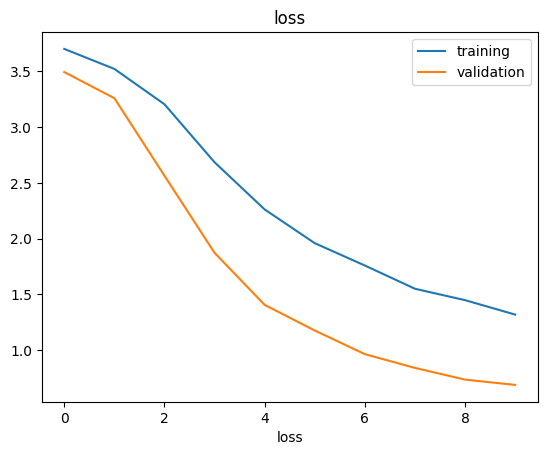

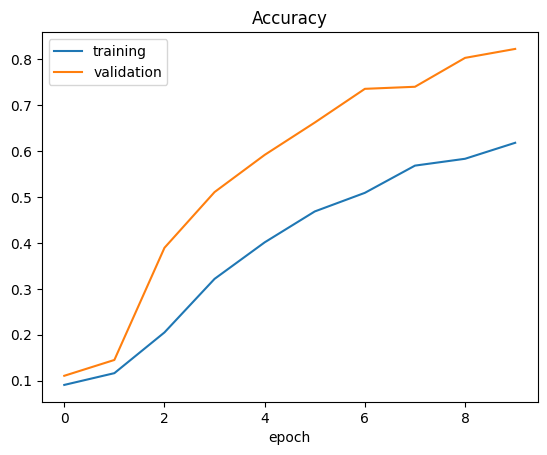

Test Score: 0.7836198210716248
Test Accuracy 0.7889688014984131


In [36]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('loss')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.show()
score=model.evaluate(X_test,Y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy',score[1])